## Problem:
- csv extracted off the "csv_n_dataset_per_image" is not consistent from machine to machine

## Target:
- extract csv

## Method:
- having an anchor point (location at local 0,0) for every image, then calculate every points relative to the anchor

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
# root = '/home/user/Dev/Git/roofcounting/'
root = 'D:/Dev/project/roofcounting/'
image_name = "Image_1b"
image_ext = ".csv"
# image_ext = ".jpg"
image_file = os.path.join("data/csv/", (image_name + image_ext))
image_path = os.path.join(root, image_file)
# image = cv2.imread(image_path)
# print(image_path)
csv_raw = pd.read_csv(image_path)

In [7]:
print(csv_raw.dtypes)
csv_raw[:7]

FID             int64
OBJECTID_1      int64
OBJECTID        int64
X_Point       float64
Y_Point       float64
X_Anchor      float64
Y_Anchor      float64
X"_Anchor     float64
Y"_Anchor     float64
X_XAnchor     float64
Y_YAnchor     float64
X_X"Anchor    float64
Y_Y"Anchor    float64
dtype: object


,FID,OBJECTID_1,OBJECTID,X_Point,Y_Point,X_Anchor,Y_Anchor,"X""_Anchor","Y""_Anchor",X_XAnchor,Y_YAnchor,"X_X""Anchor","Y_Y""Anchor"
0,0,1,4355,724027.4107,9.298447e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,470.3562,-733.2267,-41.549126,-2.43789
1,1,2,4356,724027.4107,9.298447e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,470.3562,-733.2267,-41.549126,-2.43789
2,2,3,4359,723629.2140,9.298449e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,72.1595,-731.3828,-439.745826,-0.59399
3,3,4,4360,723629.2140,9.298449e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,72.1595,-731.3828,-439.745826,-0.59399
4,4,5,4409,723582.9502,9.298456e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,25.8957,-724.5024,-486.009626,6.28641
5,5,6,4410,723582.9502,9.298456e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,25.8957,-724.5024,-486.009626,6.28641
6,6,7,4419,724067.6260,9.298455e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,510.5715,-725.2355,-1.333826,5.55331


In [8]:
# check if all x and y corresponds to the points
image_name = "Image_1b_pts"
image_ext = ".png"
# image_ext = ".jpg"
image_file = os.path.join("data/csv/", (image_name + image_ext))
image_path = os.path.join(root, image_file)
image = cv2.imread(image_path)

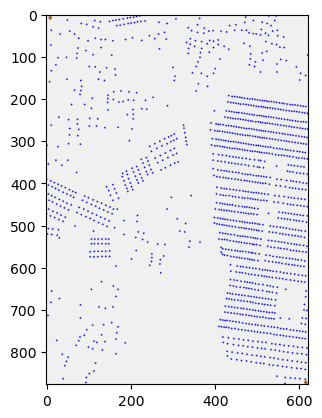

In [10]:
plt.imshow(image)

In [19]:
x_0 = max(csv_raw['X_Anchor'])
x_1 = max(csv_raw['X"_Anchor'])
y_0 = max(csv_raw['Y_Anchor'])
y_1 = max(csv_raw['Y"_Anchor'])

print("X: {}; Y: {}".format(x_1 - x_0, y_0 - y_1))

X: 511.90532600018196; Y: 730.7888099998236


In [11]:
image.shape

(877, 620, 3)

In [20]:
scale_x = image.shape[1] / (x_1 - x_0)
scale_y = image.shape[0] / (y_0 - y_1)

print("scale_x: {}; scale_y: {}".format(scale_x, scale_y))

scale_x: 1.2111614560536523; scale_y: 1.2000731100414794


In [21]:
csv_raw["x"] = csv_raw['X_Point'] - csv_raw['X_Anchor']
csv_raw["y_raw"] = csv_raw["Y_Point"] - csv_raw["Y_Anchor"]

In [22]:
csv_raw.head()

,FID,OBJECTID_1,OBJECTID,X_Point,Y_Point,X_Anchor,Y_Anchor,"X""_Anchor","Y""_Anchor",X_XAnchor,Y_YAnchor,"X_X""Anchor","Y_Y""Anchor",x,y_raw
0,0,1,4355,724027.4107,9.298447e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,470.3562,-733.2267,-41.549126,-2.43789,470.3562,-733.2267
1,1,2,4356,724027.4107,9.298447e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,470.3562,-733.2267,-41.549126,-2.43789,470.3562,-733.2267
2,2,3,4359,723629.2140,9.298449e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,72.1595,-731.3828,-439.745826,-0.59399,72.1595,-731.3828
3,3,4,4360,723629.2140,9.298449e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,72.1595,-731.3828,-439.745826,-0.59399,72.1595,-731.3828
4,4,5,4409,723582.9502,9.298456e+06,723557.0545,9.299180e+06,724068.959826,9.298449e+06,25.8957,-724.5024,-486.009626,6.28641,25.8957,-724.5024


In [23]:
csv = csv_raw[csv_raw['y_raw'] < 1][['x','y_raw']]

In [24]:
# csv_raw["FID"].value_counts()
print(csv_raw[csv_raw['y_raw'] > 1]['FID'].nunique())
print(csv_raw['FID'].count())


14
2884


In [7]:
csv = csv_raw[csv_raw['y_raw'] < 1][['x','y_raw']]

In [25]:
csv['y'] = abs(csv['y_raw'])

In [26]:
csv.drop(['y_raw'], axis=1, inplace=True)

In [27]:
csv.reset_index(inplace=True)

In [28]:
print(csv.count())
# print(csv.loc[2867])
csv.tail()

index    2870
x        2870
y        2870
dtype: int64


,index,x,y
2865,2865,299.1470,1.4998
2866,2866,160.9255,0.1317
2867,2867,160.9255,0.1317
2868,2870,391.0843,0.6955
2869,2871,391.0843,0.6955


In [33]:
csv['x'] = csv['x'] * scale_x
csv['y'] = csv['y'] * scale_y

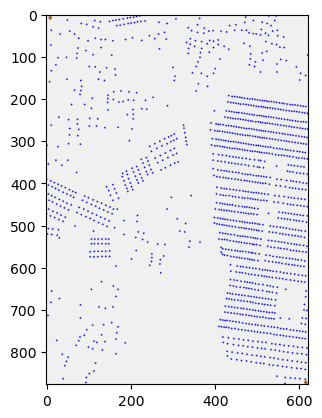

In [34]:
plt.imshow(image)

In [35]:
output = image.copy()

for i in range(len(csv)):
#     print("i: {}, X: {}, Y:{}".format(i, int(csv.loc[i, 'x']), int(csv.loc[i, 'y'])))
    cv2.circle(output, (int(csv.loc[i, 'x']), int(csv.loc[i, 'y'])), 1, (0, 255,0), 4)


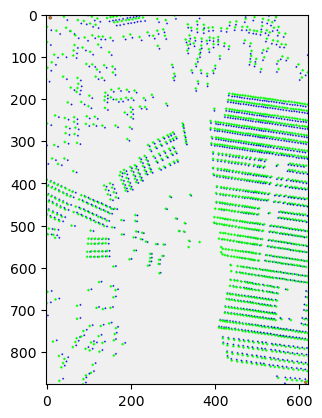

In [36]:
plt.imshow(output)

In [14]:
# need to get  canvas size
print(image.shape)
print(csv_raw[['X_Anchor', 'Y_Anchor']].max())

(1123, 794, 3)
X_Anchor    7.235571e+05
Y_Anchor    9.299180e+06
dtype: float64


## Convert canvas' x to image's x
Canvas is 1123 x 794 pixels   
while x max is (723557.0545) and y max is (9299180.191)

Cx = 1123  
Ix = 9299180.191  
Rx = Cx/Ix

then all image's x values will have to be multiply by Rx

In [71]:
Cx = image.shape[0]
Ix = csv_raw['X_Anchor'].max()
# Rx = Ix / Cx

Cy = image.shape[1]
Iy = csv_raw['Y_Anchor'].max()
# Ry = Iy / Cy

csv_raw['x_'] = csv_raw['X_Point'] / Ix * Cx
csv_raw['y_'] = csv_raw['Y_Point'] / Iy * Cy


tabs = csv_raw[['x_', 'y_']]

In [72]:
# csv['x_'] = csv['x'] * (1 + csv['x'] / Rx)
# csv['y_'] = csv['y'] * (1 + csv['y'] / Ry)

# csv['x_'] = csv['x'] / Ix * Cx
# csv['y_'] = csv['y'] / Iy * Cy

# csv['x_'] = csv['x'] / Ix * Cx
# csv['y_'] = csv['y'] / Iy * Cy

tabs.describe()

,x_,y_
count,2884.000000,2884.000000
mean,1123.522919,793.969328
std,0.227354,0.015597
min,1122.988800,793.937394
25%,1123.373681,793.958352
50%,1123.599068,793.969364
75%,1123.689977,793.980786
max,1123.800552,794.000383


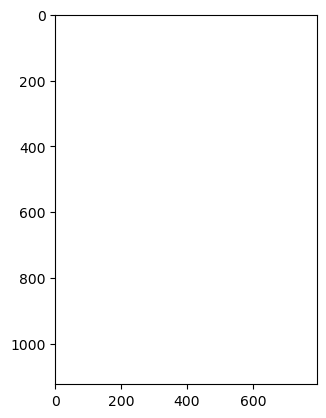

In [74]:
output = image.copy()
canvas = np.ones(image.shape)

for i in range(len(tabs)):
#     print("i: {}, X: {}, Y:{}".format(i, int(csv.loc[i, 'x']), int(csv.loc[i, 'y'])))
     cv2.circle(canvas, (int(tabs.loc[i, 'x_']), int(tabs.loc[i, 'y_'])), 1, (255, 0, 0), 4)

plt.imshow(canvas)

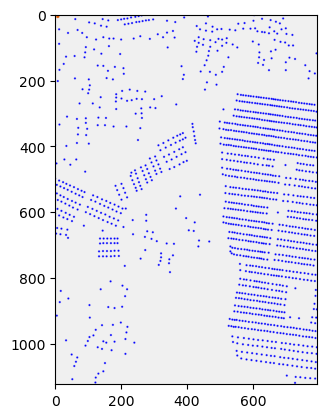

In [41]:
plt.imshow(image)

In [75]:
tabs

,x_,y_
0,1123.730018,793.937394
1,1123.730018,793.937394
2,1123.111995,793.937552
3,1123.111995,793.937552
4,1123.040192,793.938139
...,...,...
2879,1123.680290,794.000255
2880,1123.288044,794.000383
2881,1123.288044,794.000383
2882,1123.701495,794.000296


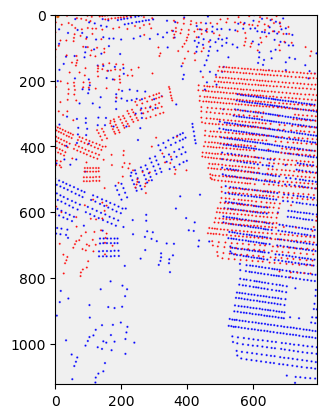

In [54]:
output = image.copy()

for i in range(len(csv)):
#     print("i: {}, X: {}, Y:{}".format(i, int(csv.loc[i, 'x']), int(csv.loc[i, 'y'])))
     cv2.circle(output, (int(csv.loc[i, 'x_']), int(csv.loc[i, 'y_'])), 1, (255, 0, 0), 4)

plt.imshow(output)

In [59]:
csv

,index,x,y,x_,y_
0,0,470.3562,733.227,428626.633045,6.071603e+06
1,1,470.3562,733.227,428626.633045,6.071603e+06
2,2,72.1595,731.383,65757.575912,6.056333e+06
3,3,72.1595,731.383,65757.575912,6.056333e+06
4,4,25.8957,724.503,23598.257451,5.999362e+06
...,...,...,...,...,...
2865,2865,299.1470,1.500,272606.954890,1.242099e+04
2866,2866,160.9255,0.132,146648.338506,1.093047e+03
2867,2867,160.9255,0.132,146648.338506,1.093047e+03
2868,2870,391.0843,0.695,356387.662682,5.755058e+03
